## Post-COVID Impact on Canada Immigrants' Employment 

This project attempts to investigate the post-COVID effect of Canada immigrant's employment situation. Three benchmarks: Probability of getting unemployed, changes in the hourly wage, and changes in the weekly working hours, are used.

The goal of this project is to provide policy suggestions for the Canadian gov't (since the Canadian gov't is current planning to attract more immigrants in the coming few years)

This project is divided into 2 parts:
1. Exploratory Data Analysis
2. Regression Analysis

I make use of the data from the Labor Force Survey collected by Statistics Canada, from Feb 2017 to Aug 2023 for my analysis.

In [1]:
# Import the necessary libraries
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [2]:
data_2017_Feb = pd.read_csv("2017-Feb.csv")
data_2017_Aug = pd.read_csv("2017-Aug.csv")
data_2018_Feb = pd.read_csv("2018-Feb.csv")
data_2018_Aug = pd.read_csv("2018-Aug.csv")
data_2019_Feb = pd.read_csv("2019-Feb.csv")
data_2019_Aug = pd.read_csv("2019-Aug.csv")
data_2020_Feb = pd.read_csv("2020-Feb.csv")
data_2020_Aug = pd.read_csv("2020-Aug.csv")
data_2021_Feb = pd.read_csv("2021-Feb.csv")
data_2021_Aug = pd.read_csv("2021-Aug.csv")
data_2022_Feb = pd.read_csv("2022-Feb.csv")
data_2022_Aug = pd.read_csv("2022-Aug.csv")
data_2023_Feb = pd.read_csv("2023-Feb.csv")
data_2023_Aug = pd.read_csv("2023-Aug.csv")

In [3]:
data_2017_Feb.head(10)

,REC_NUM,SURVYEAR,SURVMNTH,LFSSTAT,PROV,CMA,AGE_12,AGE_6,SEX,MARSTAT,...,LKATADS,LKANSADS,LKOTHERN,PRIORACT,YNOLOOK,TLOLOOK,SCHOOLN,EFAMTYPE,AGYOWNK,FINALWT
0,1,2017,2,4,35,0,8,NaN,2,5,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,16,3.0,279
1,2,2017,2,1,59,9,3,5.0,1,6,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1,NaN,636
2,3,2017,2,1,59,0,3,5.0,2,1,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,8,NaN,109
3,4,2017,2,4,35,0,9,NaN,1,5,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,11,NaN,242
4,5,2017,2,3,24,0,11,NaN,1,1,...,NaN,1.0,1.0,2.0,NaN,NaN,NaN,11,NaN,83
5,6,2017,2,1,35,3,4,NaN,1,2,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2,NaN,722
6,7,2017,2,1,12,0,4,NaN,2,1,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,3,1.0,111
7,8,2017,2,4,24,0,12,NaN,1,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11,NaN,126
8,9,2017,2,4,59,0,11,NaN,2,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,197
9,10,2017,2,4,35,0,12,NaN,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,NaN,241


In [4]:
## Append all the datasets 
df       = pd.concat([data_2017_Feb, 
                      data_2017_Aug,
                      data_2018_Feb,
                      data_2018_Aug,
                      data_2019_Feb,
                      data_2019_Aug,
                      data_2020_Feb,
                      data_2020_Aug,
                      data_2021_Feb,
                      data_2021_Aug,
                      data_2021_Feb,
                      data_2022_Feb,
                      data_2022_Aug,
                      data_2023_Feb,
                      data_2023_Aug], ignore_index=True)

# Save the data frame
df.to_csv("df.csv",index=False)

### Part 1: Exploratory Data Analysis

In [5]:
df = pd.read_csv("df.csv")

In [6]:
# Drop the sample that is not classified into the Canada force
df = df.query('(LFSSTAT != 4) & (SCHOOLN != 2) & (AGE_12 <= 9) & (AGE_12 >= 2)')

# LFSSTAT = 4 means that the individual is not in the labor force
# SCHOOLN = 2 means that the individual is currently a full-time student
# AGE_12 <= 1 means that the individual is below 18
# AGE_12 > 10 means that the individual is above 60 (the retirement age)

df

,REC_NUM,SURVYEAR,SURVMNTH,LFSSTAT,PROV,CMA,AGE_12,AGE_6,SEX,MARSTAT,...,LKANSADS,LKOTHERN,PRIORACT,YNOLOOK,TLOLOOK,SCHOOLN,EFAMTYPE,AGYOWNK,FINALWT,NOC_43
1,2,2017,2,1,59,9,3,5.0,1,6,...,NaN,NaN,NaN,NaN,NaN,1.0,1,NaN,636,NaN
2,3,2017,2,1,59,0,3,5.0,2,1,...,NaN,NaN,NaN,NaN,NaN,1.0,8,NaN,109,NaN
5,6,2017,2,1,35,3,4,NaN,1,2,...,NaN,NaN,NaN,NaN,NaN,1.0,2,NaN,722,NaN
6,7,2017,2,1,12,0,4,NaN,2,1,...,NaN,NaN,NaN,NaN,NaN,1.0,3,1.0,111,NaN
12,13,2017,2,1,24,0,4,NaN,1,6,...,NaN,NaN,NaN,NaN,NaN,1.0,1,NaN,218,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1476889,103397,2023,8,1,35,4,8,NaN,1,1,...,NaN,NaN,NaN,NaN,NaN,1.0,4,4.0,258,12.0
1476891,103399,2023,8,1,24,1,7,NaN,2,5,...,NaN,NaN,NaN,NaN,NaN,1.0,15,4.0,320,2.0
1476892,103400,2023,8,3,46,6,6,NaN,1,2,...,1.0,NaN,3.0,NaN,NaN,1.0,9,1.0,213,13.0
1476893,103401,2023,8,1,46,0,3,5.0,2,1,...,NaN,NaN,NaN,NaN,NaN,1.0,3,1.0,71,16.0


### a. Summary statistics of important variables

In [7]:
df.rename(columns={'IMMIG':'immigration status',
                  'SCHOOLN':'student status',
                  'DURUNEMP':'duration of unemployment (weeks)',
                  'TENURE':'tenure',
                  'AGE_12':'age group classification',
                  'SEX':'gender',
                  'HRLYEARN':'hourly wage',
                  'LFSSTAT':'labor force status'},
                  inplace=True)

summary_statistics = df[['labor force status', 
                         'age group classification', 
                         'gender',
                         'immigration status',
                         'tenure',
                         'hourly wage',
                         'duration of unemployment (weeks)',
                         'student status']].describe()

summary_statistics = summary_statistics.loc[['count', 'mean', 'std', 'min', 'max']]

summary_statistics = summary_statistics.round(2)

summary_statistics


,labor force status,age group classification,gender,immigration status,tenure,hourly wage,duration of unemployment (weeks),student status
count,735357.00,735357.00,735357.00,735357.00,688797.00,597897.00,42459.00,735357.00
mean,1.23,5.78,1.49,2.74,92.42,29.91,17.30,1.03
std,0.55,2.20,0.50,0.58,81.31,14.68,20.57,0.26
min,1.00,2.00,1.00,1.00,1.00,2.00,1.00,1.00
max,3.00,9.00,2.00,3.00,240.00,197.44,99.00,3.00


In [8]:
df['immigration status'].value_counts()

immigration status
3    593787
2     89453
1     52117
Name: count, dtype: int64

In [9]:
df['immigrant'] = 0
df.loc[df['immigration status'] != 3, 'immigrant'] = 1

In [10]:
df[['immigration status','immigrant']]

,immigration status,immigrant
1,3,0
2,3,0
5,3,0
6,3,0
12,3,0
...,...,...
1476889,2,1
1476891,3,0
1476892,3,0
1476893,3,0


### b. Pie chart showing the distribution of immigration status of people living in Canada

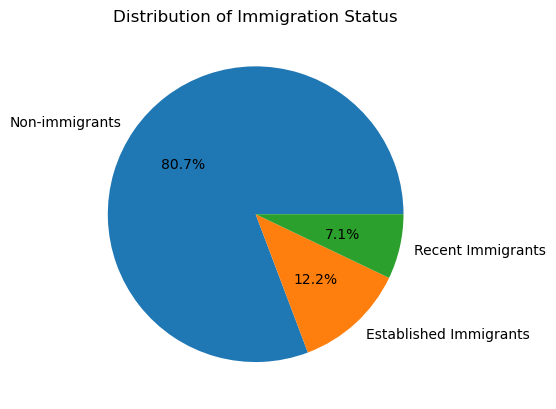

In [11]:
immigration_counts = df['immigration status'].value_counts()
proportion = immigration_counts / len(df['immigration status'])
immigration_status_index = ['Non-immigrants','Established Immigrants','Recent Immigrants']

plt.pie(proportion, labels=immigration_status_index,autopct='%1.1f%%')
plt.title('Distribution of Immigration Status')
plt.show()


In [12]:
df[['labor force status','immigration status']].describe()

,labor force status,immigration status
count,735357.000000,735357.000000
mean,1.234134,2.736608
std,0.553126,0.579451
min,1.000000,1.000000
25%,1.000000,3.000000
50%,1.000000,3.000000
75%,1.000000,3.000000
max,3.000000,3.000000


In [13]:
df['unemployed'] = 0
df.loc[df['immigration status'] == 3, 'unemployed'] = 1

df[['unemployed','immigration status']]

,unemployed,immigration status
1,1,3
2,1,3
5,1,3
6,1,3
12,1,3
...,...,...
1476889,0,2
1476891,1,3
1476892,1,3
1476893,1,3


In [14]:
df.groupby('immigration status')['unemployed'].mean()

immigration status
1    0.0
2    0.0
3    1.0
Name: unemployed, dtype: float64

In [15]:
immigration_counts = df['immigration status'].value_counts()
immigration_counts

immigration status
3    593787
2     89453
1     52117
Name: count, dtype: int64

In [16]:
cross_tab = pd.crosstab(df['immigration status'], df['labor force status'])
cross_tab

labor force status,1,2,3
immigration status,,,
1,43882,4280,3955
2,76233,7967,5253
3,489630,66805,37352


In [17]:
df['unemployed'] = 0
df.loc[df['labor force status'] == 3, 'unemployed'] = 1

df[['unemployed', 'immigration status']].value_counts()

unemployed  immigration status
0           3                     556435
            2                      84200
            1                      48162
1           3                      37352
            2                       5253
            1                       3955
Name: count, dtype: int64

In [18]:
df.groupby('immigration status')['unemployed'].describe()

,count,mean,std,min,25%,50%,75%,max
immigration status,,,,,,,,
1,52117.0,0.075887,0.264820,0.0,0.0,0.0,0.0,1.0
2,89453.0,0.058724,0.235108,0.0,0.0,0.0,0.0,1.0
3,593787.0,0.062905,0.242792,0.0,0.0,0.0,0.0,1.0


In [19]:
len(df['unemployed'])

735357

In [20]:
len(df['immigration status'])

735357

In [21]:
unemployment_rate = df.groupby('immigration status')['unemployed'].mean() * 100
unemployment_rate

immigration status
1    7.588695
2    5.872358
3    6.290471
Name: unemployed, dtype: float64

### c. Bar chart showing unemployment rate classified by immigration status

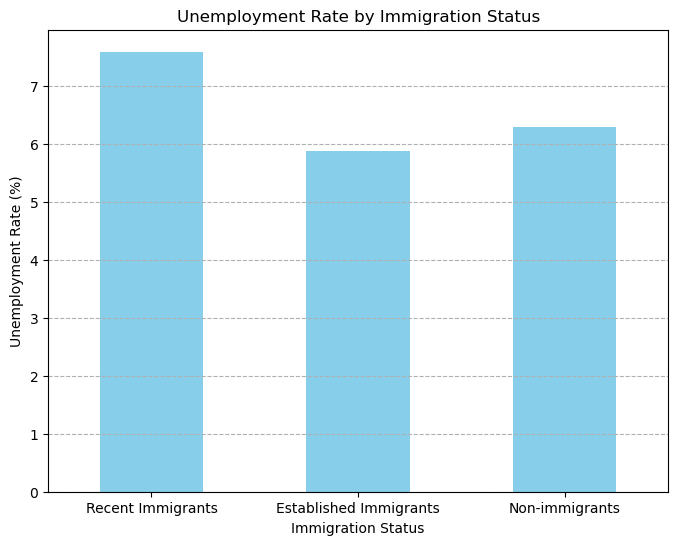

In [22]:
new_labels = ['Recent Immigrants', 'Established Immigrants', 'Non-immigrants']

# Plotting the bar chart
plt.figure(figsize=(8, 6))
unemployment_rate.plot(kind='bar', color='skyblue')
plt.title('Unemployment Rate by Immigration Status')
plt.xlabel('Immigration Status')
plt.ylabel('Unemployment Rate (%)')

# Set custom labels for the x-axis
plt.xticks(range(len(new_labels)), new_labels, rotation=0)

plt.grid(axis='y', linestyle='--')#, alpha=0.7  # Add horizontal grid lines
plt.show()


#### It can be clearly seen that the unemployment rate of the recent immigrants are higher than the other 2 groups. On the other hand, established immigrants have a similar unemployment rate with those who are locals. 

#### One can hypothesize that the labor market in Canada is less favorable for the recent immigrants. At the same time, it is also worth studying whether this situation is improved after the labor market stabilized in the post-COVID period.

In [23]:
df[['immigration status','hourly wage']]

,immigration status,hourly wage
1,3,NaN
2,3,21.03
5,3,31.25
6,3,15.40
12,3,24.00
...,...,...
1476889,2,49.23
1476891,3,76.00
1476892,3,NaN
1476893,3,44.00


In [24]:
df.groupby('immigration status')['hourly wage'].describe()

,count,mean,std,min,25%,50%,75%,max
immigration status,,,,,,,,
1,42654.0,25.951419,13.995861,3.13,16.25,21.635,31.25,192.31
2,69266.0,30.742451,15.918201,3.00,19.23,26.245,38.46,192.82
3,485977.0,30.134257,14.507336,2.00,19.50,26.670,38.08,197.44


In [25]:
df = df.dropna(subset=['hourly wage'])
df[['immigration status', 'hourly wage']].isna().sum()

immigration status    0
hourly wage           0
dtype: int64

### d. Kernel density plot for the hourly wage rate of the Canada workers classified by immigration status

C:\Users\jacky\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\jacky\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\jacky\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


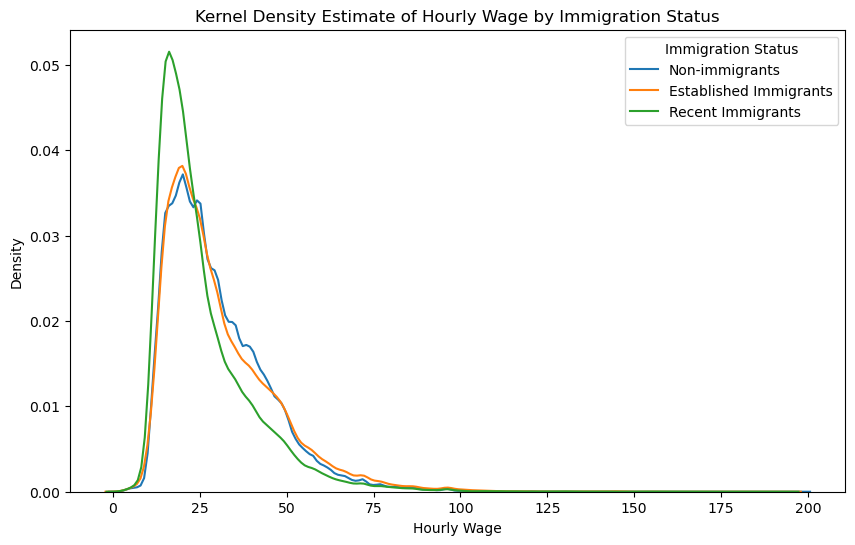

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame containing the 'hourly wage' and 'immigration status' columns

# Set the figure size
plt.figure(figsize=(10, 6))

# Plot KDE for each category of 'immigration status' with custom labels
for status in df['immigration status'].unique():
    # Select 'hourly wage' values for the current category
    wages = df[df['immigration status'] == status]['hourly wage']
    
    # Plot KDE for the current category with custom label
    sns.kdeplot(wages, label=status)  # Use the original category value as label
    
# Add title and labels
plt.title('Kernel Density Estimate of Hourly Wage by Immigration Status')
plt.xlabel('Hourly Wage')
plt.ylabel('Density')

# Add legend with custom labels
plt.legend(title='Immigration Status', labels=['Non-immigrants', 'Established Immigrants', 'Recent Immigrants'])

# Show the plot
plt.show()


#### Once again, the kernel density for the recent immigrants are more tiled towards the left. That means, their mean wage is lower than established immigrants and locals. 

### 2. Regression Analysis 

In [27]:
df = pd.read_csv("df.csv")

In [28]:
df = df.query('(LFSSTAT != 4) & (SCHOOLN != 2)')
df

,REC_NUM,SURVYEAR,SURVMNTH,LFSSTAT,PROV,CMA,AGE_12,AGE_6,SEX,MARSTAT,...,LKANSADS,LKOTHERN,PRIORACT,YNOLOOK,TLOLOOK,SCHOOLN,EFAMTYPE,AGYOWNK,FINALWT,NOC_43
1,2,2017,2,1,59,9,3,5.0,1,6,...,NaN,NaN,NaN,NaN,NaN,1.0,1,NaN,636,NaN
2,3,2017,2,1,59,0,3,5.0,2,1,...,NaN,NaN,NaN,NaN,NaN,1.0,8,NaN,109,NaN
4,5,2017,2,3,24,0,11,NaN,1,1,...,1.0,1.0,2.0,NaN,NaN,NaN,11,NaN,83,NaN
5,6,2017,2,1,35,3,4,NaN,1,2,...,NaN,NaN,NaN,NaN,NaN,1.0,2,NaN,722,NaN
6,7,2017,2,1,12,0,4,NaN,2,1,...,NaN,NaN,NaN,NaN,NaN,1.0,3,1.0,111,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1476891,103399,2023,8,1,24,1,7,NaN,2,5,...,NaN,NaN,NaN,NaN,NaN,1.0,15,4.0,320,2.0
1476892,103400,2023,8,3,46,6,6,NaN,1,2,...,1.0,NaN,3.0,NaN,NaN,1.0,9,1.0,213,13.0
1476893,103401,2023,8,1,46,0,3,5.0,2,1,...,NaN,NaN,NaN,NaN,NaN,1.0,3,1.0,71,16.0
1476894,103402,2023,8,1,12,0,1,1.0,2,6,...,NaN,NaN,NaN,NaN,NaN,1.0,14,NaN,240,31.0


In [29]:
df['unemployed'] = 0
df.loc[df['LFSSTAT'] == 3, 'unemployed'] = 1

In [30]:
df[['LFSSTAT','unemployed']]

,LFSSTAT,unemployed
1,1,0
2,1,0
4,3,1
5,1,0
6,1,0
...,...,...
1476891,1,0
1476892,3,1
1476893,1,0
1476894,1,0


In [31]:
df['immig'] = 0 
df.loc[df['IMMIG'] !=3, 'immig'] = 1

df

,REC_NUM,SURVYEAR,SURVMNTH,LFSSTAT,PROV,CMA,AGE_12,AGE_6,SEX,MARSTAT,...,PRIORACT,YNOLOOK,TLOLOOK,SCHOOLN,EFAMTYPE,AGYOWNK,FINALWT,NOC_43,unemployed,immig
1,2,2017,2,1,59,9,3,5.0,1,6,...,NaN,NaN,NaN,1.0,1,NaN,636,NaN,0,0
2,3,2017,2,1,59,0,3,5.0,2,1,...,NaN,NaN,NaN,1.0,8,NaN,109,NaN,0,0
4,5,2017,2,3,24,0,11,NaN,1,1,...,2.0,NaN,NaN,NaN,11,NaN,83,NaN,1,0
5,6,2017,2,1,35,3,4,NaN,1,2,...,NaN,NaN,NaN,1.0,2,NaN,722,NaN,0,0
6,7,2017,2,1,12,0,4,NaN,2,1,...,NaN,NaN,NaN,1.0,3,1.0,111,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1476891,103399,2023,8,1,24,1,7,NaN,2,5,...,NaN,NaN,NaN,1.0,15,4.0,320,2.0,0,0
1476892,103400,2023,8,3,46,6,6,NaN,1,2,...,3.0,NaN,NaN,1.0,9,1.0,213,13.0,1,0
1476893,103401,2023,8,1,46,0,3,5.0,2,1,...,NaN,NaN,NaN,1.0,3,1.0,71,16.0,0,0
1476894,103402,2023,8,1,12,0,1,1.0,2,6,...,NaN,NaN,NaN,1.0,14,NaN,240,31.0,0,0


In [32]:
df['postCOVID'] = 0 
df.loc[df['SURVYEAR'] >= 2022, 'postCOVID'] = 1 

df

,REC_NUM,SURVYEAR,SURVMNTH,LFSSTAT,PROV,CMA,AGE_12,AGE_6,SEX,MARSTAT,...,YNOLOOK,TLOLOOK,SCHOOLN,EFAMTYPE,AGYOWNK,FINALWT,NOC_43,unemployed,immig,postCOVID
1,2,2017,2,1,59,9,3,5.0,1,6,...,NaN,NaN,1.0,1,NaN,636,NaN,0,0,0
2,3,2017,2,1,59,0,3,5.0,2,1,...,NaN,NaN,1.0,8,NaN,109,NaN,0,0,0
4,5,2017,2,3,24,0,11,NaN,1,1,...,NaN,NaN,NaN,11,NaN,83,NaN,1,0,0
5,6,2017,2,1,35,3,4,NaN,1,2,...,NaN,NaN,1.0,2,NaN,722,NaN,0,0,0
6,7,2017,2,1,12,0,4,NaN,2,1,...,NaN,NaN,1.0,3,1.0,111,NaN,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1476891,103399,2023,8,1,24,1,7,NaN,2,5,...,NaN,NaN,1.0,15,4.0,320,2.0,0,0,1
1476892,103400,2023,8,3,46,6,6,NaN,1,2,...,NaN,NaN,1.0,9,1.0,213,13.0,1,0,1
1476893,103401,2023,8,1,46,0,3,5.0,2,1,...,NaN,NaN,1.0,3,1.0,71,16.0,0,0,1
1476894,103402,2023,8,1,12,0,1,1.0,2,6,...,NaN,NaN,1.0,14,NaN,240,31.0,0,0,1


In [33]:
df['interaction_term'] = df['immig'] * df['postCOVID']
df

,REC_NUM,SURVYEAR,SURVMNTH,LFSSTAT,PROV,CMA,AGE_12,AGE_6,SEX,MARSTAT,...,TLOLOOK,SCHOOLN,EFAMTYPE,AGYOWNK,FINALWT,NOC_43,unemployed,immig,postCOVID,interaction_term
1,2,2017,2,1,59,9,3,5.0,1,6,...,NaN,1.0,1,NaN,636,NaN,0,0,0,0
2,3,2017,2,1,59,0,3,5.0,2,1,...,NaN,1.0,8,NaN,109,NaN,0,0,0,0
4,5,2017,2,3,24,0,11,NaN,1,1,...,NaN,NaN,11,NaN,83,NaN,1,0,0,0
5,6,2017,2,1,35,3,4,NaN,1,2,...,NaN,1.0,2,NaN,722,NaN,0,0,0,0
6,7,2017,2,1,12,0,4,NaN,2,1,...,NaN,1.0,3,1.0,111,NaN,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1476891,103399,2023,8,1,24,1,7,NaN,2,5,...,NaN,1.0,15,4.0,320,2.0,0,0,1,0
1476892,103400,2023,8,3,46,6,6,NaN,1,2,...,NaN,1.0,9,1.0,213,13.0,1,0,1,0
1476893,103401,2023,8,1,46,0,3,5.0,2,1,...,NaN,1.0,3,1.0,71,16.0,0,0,1,0
1476894,103402,2023,8,1,12,0,1,1.0,2,6,...,NaN,1.0,14,NaN,240,31.0,0,0,1,0


In [34]:
df['gender'] = 0 
df.loc[df['SEX'] == 1, 'gender'] = 1 

df[['SEX','gender']]

,SEX,gender
1,1,1
2,2,0
4,1,1
5,1,1
6,2,0
...,...,...
1476891,2,0
1476892,1,1
1476893,2,0
1476894,2,0


In [35]:
df['educ'] = 0 
df.loc[(df['EDUC'] != 0) & (df['EDUC'] != 1), 'educ'] = 1

df[['EDUC','educ']]

,EDUC,educ
1,4,1
2,5,1
4,2,1
5,5,1
6,6,1
...,...,...
1476891,4,1
1476892,3,1
1476893,5,1
1476894,1,0


In [36]:
df = df[['unemployed','immig','postCOVID', 'interaction_term', 'gender', 'educ']]

### a. Logistic regression on the probability of getting unemployed

In [37]:
# Extract features (X) and target variable (y)
X = df[['immig','postCOVID', 'interaction_term', 'gender', 'educ']]  # Features (multiple X variables)
y = df['unemployed']  # Target variable

# Add constant term for intercept
X = sm.add_constant(X)

# Fit logistic regression model
model = sm.Logit(y, X)
result = model.fit()

# Print summary including coefficients, standard errors, p-values, and more
print(result.summary())


Optimization terminated successfully.
         Current function value: 0.244867
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:             unemployed   No. Observations:               894039
Model:                          Logit   Df Residuals:                   894033
Method:                           MLE   Df Model:                            5
Date:                Tue, 14 May 2024   Pseudo R-squ.:                0.009736
Time:                        14:01:51   Log-Likelihood:            -2.1892e+05
converged:                       True   LL-Null:                   -2.2107e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -1.9207      0.012   -154.510      0.000      -1.945      -1.896
immig      

#### The variable of interest in this logistic regression: interaction_term. It captures the impact of the stabilization of COVID on immigrants' probability of getting unemployed.

#### The result shows that the probability of immigrants getting unemployed is 0.5% lower than the baseline (i.e. non-immigrants, before COVID, females & with no education). However, the p-value of the result is 0.844, reflecting that the value is not statistially significant at the 5% level. Therefore, from this result we cannot see any significant impact of post-COVID on immigrants' unemployment situation. 

### b. Logistic regression - in depth analysis on recent and established immigrants

This time, the same model - logistic regression is being used. However, this time I further break down the immigrants group into recent immigrants (landed in Canada for less than 10 years) & established immigrants (landed in Canada for at least 10 years) 

In [38]:
df = pd.read_csv("df.csv")
df

,REC_NUM,SURVYEAR,SURVMNTH,LFSSTAT,PROV,CMA,AGE_12,AGE_6,SEX,MARSTAT,...,LKANSADS,LKOTHERN,PRIORACT,YNOLOOK,TLOLOOK,SCHOOLN,EFAMTYPE,AGYOWNK,FINALWT,NOC_43
0,1,2017,2,4,35,0,8,NaN,2,5,...,NaN,NaN,NaN,NaN,NaN,1.0,16,3.0,279,NaN
1,2,2017,2,1,59,9,3,5.0,1,6,...,NaN,NaN,NaN,NaN,NaN,1.0,1,NaN,636,NaN
2,3,2017,2,1,59,0,3,5.0,2,1,...,NaN,NaN,NaN,NaN,NaN,1.0,8,NaN,109,NaN
3,4,2017,2,4,35,0,9,NaN,1,5,...,NaN,NaN,NaN,NaN,NaN,1.0,11,NaN,242,NaN
4,5,2017,2,3,24,0,11,NaN,1,1,...,1.0,1.0,2.0,NaN,NaN,NaN,11,NaN,83,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1476891,103399,2023,8,1,24,1,7,NaN,2,5,...,NaN,NaN,NaN,NaN,NaN,1.0,15,4.0,320,2.0
1476892,103400,2023,8,3,46,6,6,NaN,1,2,...,1.0,NaN,3.0,NaN,NaN,1.0,9,1.0,213,13.0
1476893,103401,2023,8,1,46,0,3,5.0,2,1,...,NaN,NaN,NaN,NaN,NaN,1.0,3,1.0,71,16.0
1476894,103402,2023,8,1,12,0,1,1.0,2,6,...,NaN,NaN,NaN,NaN,NaN,1.0,14,NaN,240,31.0


In [39]:
df = df.query('(LFSSTAT != 4) & (SCHOOLN != 2)')
df

,REC_NUM,SURVYEAR,SURVMNTH,LFSSTAT,PROV,CMA,AGE_12,AGE_6,SEX,MARSTAT,...,LKANSADS,LKOTHERN,PRIORACT,YNOLOOK,TLOLOOK,SCHOOLN,EFAMTYPE,AGYOWNK,FINALWT,NOC_43
1,2,2017,2,1,59,9,3,5.0,1,6,...,NaN,NaN,NaN,NaN,NaN,1.0,1,NaN,636,NaN
2,3,2017,2,1,59,0,3,5.0,2,1,...,NaN,NaN,NaN,NaN,NaN,1.0,8,NaN,109,NaN
4,5,2017,2,3,24,0,11,NaN,1,1,...,1.0,1.0,2.0,NaN,NaN,NaN,11,NaN,83,NaN
5,6,2017,2,1,35,3,4,NaN,1,2,...,NaN,NaN,NaN,NaN,NaN,1.0,2,NaN,722,NaN
6,7,2017,2,1,12,0,4,NaN,2,1,...,NaN,NaN,NaN,NaN,NaN,1.0,3,1.0,111,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1476891,103399,2023,8,1,24,1,7,NaN,2,5,...,NaN,NaN,NaN,NaN,NaN,1.0,15,4.0,320,2.0
1476892,103400,2023,8,3,46,6,6,NaN,1,2,...,1.0,NaN,3.0,NaN,NaN,1.0,9,1.0,213,13.0
1476893,103401,2023,8,1,46,0,3,5.0,2,1,...,NaN,NaN,NaN,NaN,NaN,1.0,3,1.0,71,16.0
1476894,103402,2023,8,1,12,0,1,1.0,2,6,...,NaN,NaN,NaN,NaN,NaN,1.0,14,NaN,240,31.0


In [40]:
df['LFSSTAT']

1          1
2          1
4          3
5          1
6          1
          ..
1476891    1
1476892    3
1476893    1
1476894    1
1476895    1
Name: LFSSTAT, Length: 894039, dtype: int64

In [41]:
df['unemployed'] = 0
df.loc[df['LFSSTAT'] == 3, 'unemployed'] = 1

df['postCOVID'] = 0 
df.loc[df['SURVYEAR'] >= 2022, 'postCOVID'] = 1

df['RecentImm'] = 0 
df.loc[df['IMMIG'] == 1, 'RecentImm'] = 1

df['EstaImm'] = 0 
df.loc[df['IMMIG'] == 2, 'EstaImm'] = 1

df['interact_Recent'] = df['RecentImm'] * df['postCOVID']
df['interact_Established'] = df['EstaImm'] * df['postCOVID']

df['gender'] = 0
df.loc[df['SEX'] == 1, 'gender'] = 1

df['educ'] = 0 
df.loc[(df['EDUC'] != 0) & (df['EDUC'] != 1), 'educ'] = 1

C:\Users\jacky\AppData\Local\Temp\ipykernel_9744\825519790.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['unemployed'] = 0
C:\Users\jacky\AppData\Local\Temp\ipykernel_9744\825519790.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['postCOVID'] = 0
C:\Users\jacky\AppData\Local\Temp\ipykernel_9744\825519790.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentatio

In [42]:
df['unemployed'].mean()

0.06755745554724123

In [43]:
df.isna().sum()

REC_NUM                 0
SURVYEAR                0
SURVMNTH                0
LFSSTAT                 0
PROV                    0
                       ..
EstaImm                 0
interact_Recent         0
interact_Established    0
gender                  0
educ                    0
Length: 69, dtype: int64

In [44]:
from sklearn.linear_model import LogisticRegression

#df = df.dropna(subset=['unemployed'])

X = df[['RecentImm','EstaImm', 'postCOVID', 'interact_Recent', 'interact_Established', 'gender', 'educ']]
y = df['unemployed']

model = LogisticRegression()
model.fit(X,y)

predictions = model.predict(X)

In [45]:
# Extract features (X) and target variable (y)
X = df[['RecentImm','EstaImm', 'postCOVID', 'interact_Recent', 'interact_Established', 'gender', 'educ']]  # Features (multiple X variables)
y = df['unemployed']  # Target variable

# Add constant term for intercept
X = sm.add_constant(X)

# Fit logistic regression model
model = sm.Logit(y, X)
result = model.fit()

# Print summary including coefficients, standard errors, p-values, and more
print(result.summary())



Optimization terminated successfully.
         Current function value: 0.244705
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:             unemployed   No. Observations:               894039
Model:                          Logit   Df Residuals:                   894031
Method:                           MLE   Df Model:                            7
Date:                Tue, 14 May 2024   Pseudo R-squ.:                 0.01039
Time:                        14:02:09   Log-Likelihood:            -2.1878e+05
converged:                       True   LL-Null:                   -2.2107e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -1.9187      0.012   -154.339      0.000      -1.943      -1.894

#### Once again, my variable of interest is the 2 interaction terms.

#### Since the p-values for both of the variables is greater than 0.05 (0.21 for recent immigrants & 0.677 for established immigrants), I concluded that there is no significant impact of COVID stabilization on their probability of getting unemployed.

### c. Linear regression - post-COVID impact on immigrants' hourly wages

In [46]:
df = pd.read_csv("df.csv")

In [47]:
df['lwage'] = np.log(df['HRLYEARN'])

df['immig'] = 0
df.loc[df['IMMIG'] != 3, 'immig'] = 1

df['gender'] = 0
df.loc[df['SEX'] == 1, 'gender'] = 1

df['educ'] = 0
df.loc[(df['EDUC'] != 0) & (df['EDUC'] != 1), 'educ'] = 1

df['married'] = 0 
df.loc[df['MARSTAT'] == 1, 'married'] = 1

df['fulltime'] = 0 
df.loc[df['FTPTMAIN'] == 1, 'fulltime'] = 1

df['union'] = 0
df.loc[df['UNION'] == 1, 'union'] = 1

df['perm'] = 0
df.loc[df['PERMTEMP'] == 1, 'perm'] = 1

df['large_firm'] = 0
df.loc[(df['FIRMSIZE'] != 1) & (df['FIRMSIZE'] != 2), 'large_firm'] = 1

df['postCOVID'] = 0
df.loc[df['SURVYEAR'] >= 2022, 'postCOVID'] = 1

df['interaction_term'] = df['immig'] * df['postCOVID']

In [48]:
df[['lwage','immig', 'gender', 'educ', 'married', 'fulltime', 'union', 'perm', 'large_firm', 'postCOVID', 'interaction_term']].mean()

lwage               3.235493
immig               0.184229
gender              0.486489
educ                0.833986
married             0.486791
fulltime            0.478908
union               0.154345
perm                0.435781
large_firm          0.824076
postCOVID           0.286469
interaction_term    0.060520
dtype: float64

In [49]:
df[['lwage','immig', 'gender', 'educ', 'married', 'fulltime', 'union', 'perm', 'large_firm', 'postCOVID', 'interaction_term']].isna().sum()

lwage               738230
immig                    0
gender                   0
educ                     0
married                  0
fulltime                 0
union                    0
perm                     0
large_firm               0
postCOVID                0
interaction_term         0
dtype: int64

In [50]:
df = df[['lwage','immig', 'gender', 'educ', 'married', 'fulltime', 'union', 'perm', 'large_firm', 'postCOVID', 'interaction_term']].dropna()
df

,lwage,immig,gender,educ,married,fulltime,union,perm,large_firm,postCOVID,interaction_term
2,3.045950,0,0,1,1,1,0,1,1,0,0
5,3.442019,0,1,1,0,1,0,1,0,0,0
6,2.734368,0,0,1,1,0,0,1,0,0,0
12,3.178054,0,1,1,0,1,0,1,1,0,0
13,2.484907,0,0,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1476889,3.896503,1,1,1,1,1,0,1,1,1,1
1476891,4.330733,0,0,1,0,1,0,1,1,1,0
1476893,3.784190,0,0,1,1,1,1,0,1,1,0
1476894,2.812410,0,0,0,0,0,0,0,1,1,0


In [51]:
# Define dependent variable (y) and independent variables (X)
y = df['lwage']
X = df[['immig', 'gender', 'educ', 'married', 'fulltime', 'union', 'perm', 'large_firm', 'postCOVID', 'interaction_term']]

# Drop rows with missing values in both X and y variables
#df = df.dropna(df[['lwage','immig', 'gender', 'educ', 'married', 'fulltime', 'union', 'perm', 'large_firm', 'postCOVID', 'interaction_term']])

# Add constant term for intercept
X = sm.add_constant(X)

# Fit OLS linear regression model
model = sm.OLS(y, X)
result = model.fit()

# Print summary including coefficients, standard errors, p-values, and more
print(result.summary())


                            OLS Regression Results                            
Dep. Variable:                  lwage   R-squared:                       0.259
Model:                            OLS   Adj. R-squared:                  0.259
Method:                 Least Squares   F-statistic:                 2.578e+04
Date:                Tue, 14 May 2024   Prob (F-statistic):               0.00
Time:                        14:02:18   Log-Likelihood:            -3.9040e+05
No. Observations:              738666   AIC:                         7.808e+05
Df Residuals:                  738655   BIC:                         7.809e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                2.3834      0.002  

#### from the result, the p-value of the interaction term is smaller than 0.05, indicating that the coefficient is statistically significant at the 5% level.

#### the interaction terms suggests that the COVID stabilization in Canada has increased the Canada immigrants' wages by 2%, which is not a very significant number. 

### d. Linear Regression - weekly working hours of immmigrants

In [52]:
df = pd.read_csv("df.csv")

In [53]:
df['immig'] = 0
df.loc[df['IMMIG'] != 3, 'immig'] = 1

df['gender'] = 0
df.loc[df['SEX'] == 1, 'gender'] = 1

df['educ'] = 0
df.loc[(df['EDUC'] != 0) & (df['EDUC'] != 1), 'educ'] = 1

df['married'] = 0 
df.loc[df['MARSTAT'] == 1, 'married'] = 1

df['fulltime'] = 0 
df.loc[df['FTPTMAIN'] == 1, 'fulltime'] = 1

df['union'] = 0
df.loc[df['UNION'] == 1, 'union'] = 1

df['perm'] = 0
df.loc[df['PERMTEMP'] == 1, 'perm'] = 1

df['large_firm'] = 0
df.loc[(df['FIRMSIZE'] != 1) & (df['FIRMSIZE'] != 2), 'large_firm'] = 1

df['postCOVID'] = 0
df.loc[df['SURVYEAR'] >= 2022, 'postCOVID'] = 1

df['interaction_term'] = df['immig'] * df['postCOVID']

In [54]:
df[['ATOTHRS','immig', 'gender', 'educ', 'married', 'fulltime', 'union', 'perm', 'large_firm', 'postCOVID', 'interaction_term','TENURE']].mean()

ATOTHRS             32.167648
immig                0.184229
gender               0.486489
educ                 0.833986
married              0.486791
fulltime             0.478908
union                0.154345
perm                 0.435781
large_firm           0.824076
postCOVID            0.286469
interaction_term     0.060520
TENURE              95.296612
dtype: float64

In [55]:
df['work_hr'] = df['ATOTHRS']

df['tenure'] = df['TENURE']

df

,REC_NUM,SURVYEAR,SURVMNTH,LFSSTAT,PROV,CMA,AGE_12,AGE_6,SEX,MARSTAT,...,educ,married,fulltime,union,perm,large_firm,postCOVID,interaction_term,work_hr,tenure
0,1,2017,2,4,35,0,8,NaN,2,5,...,1,0,0,0,0,1,0,0,NaN,NaN
1,2,2017,2,1,59,9,3,5.0,1,6,...,1,0,0,0,0,1,0,0,14.0,89.0
2,3,2017,2,1,59,0,3,5.0,2,1,...,1,1,1,0,1,1,0,0,37.5,18.0
3,4,2017,2,4,35,0,9,NaN,1,5,...,0,0,0,0,0,1,0,0,NaN,NaN
4,5,2017,2,3,24,0,11,NaN,1,1,...,1,1,0,0,0,1,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1476891,103399,2023,8,1,24,1,7,NaN,2,5,...,1,0,1,0,1,1,1,0,35.0,240.0
1476892,103400,2023,8,3,46,6,6,NaN,1,2,...,1,0,0,0,0,1,1,0,NaN,NaN
1476893,103401,2023,8,1,46,0,3,5.0,2,1,...,1,1,1,1,0,1,1,0,28.0,35.0
1476894,103402,2023,8,1,12,0,1,1.0,2,6,...,0,0,0,0,0,1,1,0,23.0,14.0


In [56]:
df[['work_hr','immig', 'gender', 'educ', 'married', 'fulltime', 'union', 'perm', 'large_firm', 'postCOVID', 'interaction_term','tenure']].isna().sum()

work_hr             611179
immig                    0
gender                   0
educ                     0
married                  0
fulltime                 0
union                    0
perm                     0
large_firm               0
postCOVID                0
interaction_term         0
tenure              611179
dtype: int64

In [57]:
df = df[['work_hr','immig', 'gender', 'educ', 'married', 'fulltime', 'union', 'perm', 'large_firm', 'postCOVID', 'interaction_term','tenure']].dropna()

In [58]:
df = df[['work_hr','immig', 'gender', 'educ', 'married', 'fulltime', 'union', 'perm', 'large_firm', 'postCOVID', 'interaction_term','tenure']]
df

,work_hr,immig,gender,educ,married,fulltime,union,perm,large_firm,postCOVID,interaction_term,tenure
1,14.0,0,1,1,0,0,0,0,1,0,0,89.0
2,37.5,0,0,1,1,1,0,1,1,0,0,18.0
5,42.0,0,1,1,0,1,0,1,0,0,0,122.0
6,10.0,0,0,1,1,0,0,1,0,0,0,94.0
12,38.0,0,1,1,0,1,0,1,1,0,0,45.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1476889,42.5,1,1,1,1,1,0,1,1,1,1,52.0
1476891,35.0,0,0,1,0,1,0,1,1,1,0,240.0
1476893,28.0,0,0,1,1,1,1,0,1,1,0,35.0
1476894,23.0,0,0,0,0,0,0,0,1,1,0,14.0


In [59]:
y = df['work_hr']
X = df[['immig', 'gender', 'educ', 'married', 'fulltime', 'union', 'perm', 'large_firm', 'postCOVID', 'interaction_term','tenure']]

X = sm.add_constant(X)

# Fit OLS linear regression model
model = sm.OLS(y, X)
result = model.fit()

# Print summary including coefficients, standard errors, p-values, and more
print(result.summary())


                            OLS Regression Results                            
Dep. Variable:                work_hr   R-squared:                       0.210
Model:                            OLS   Adj. R-squared:                  0.210
Method:                 Least Squares   F-statistic:                 2.086e+04
Date:                Tue, 14 May 2024   Prob (F-statistic):               0.00
Time:                        14:02:28   Log-Likelihood:            -3.6105e+06
No. Observations:              865717   AIC:                         7.221e+06
Df Residuals:                  865705   BIC:                         7.221e+06
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               16.0799      0.075  

#### The variable of interest (again, the interaction term) is not significant at the 5% level. Therefore, no results can be drawn from this model

The final conclusion:
    
From the above regression analysis, we cannot see any significant improvement of the immigrants' employment situation, in the perspective of probability of getting unemployed, hourly wage, and weekly working hours (there is a slight increase in their hourly wages, but the invrease in percentage is pretty small)

Therefore, given that the Canadian government is planning to attract more immigrants in the future, it is suggested that the Canadian gov't should try to provide more labor market incentives to the immigrants in order to provide a higher incentive for them to enter the Canada labor market.